# Titanic - ML from Disaster

This project analyzes passenger data from the Titanic to predict survival outcomes. The goal is to build a machine learning model that can accurately determine whether a passenger survived based on features like age, sex, class, and port of embarkation.

We'll follow a typical ML pipeline:
1. Exploratory Data Analysis (EDA)
2. Data Cleaning & Preprocessing
3. Model Training & Evaluation
4. Final Prediction and Submission


### Step 1 : Import Library Needed

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Step 2 : Load and Inspect the Data

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [12]:
# Quick overview
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Step 3 : EDA (Exploratory Data Analysis)

We begin by visualizing key relationships in the data to identify patterns that may influence survival, such as gender, passenger class, and age distribution.

In [22]:
# Summary statistics and missing values overview
print("Summary Statistics:\n", train_df.describe(include='all'))
print("Missing Values:\n", train_df.isnull().sum())

Summary Statistics:
         PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN                  891     2   
top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
freq            NaN         NaN         NaN                    1   577   
mean     446.000000    0.383838    2.308642                  NaN   NaN   
std      257.353842    0.486592    0.836071                  NaN   NaN   
min        1.000000    0.000000    1.000000                  NaN   NaN   
25%      223.500000    0.000000    2.000000                  NaN   NaN   
50%      446.000000    0.000000    3.000000                  NaN   NaN   
75%      668.500000    1.000000    3.000000                  NaN   NaN   
max      891.000000    1.000000    3.000000                  NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Cabin Embarked  
count   71

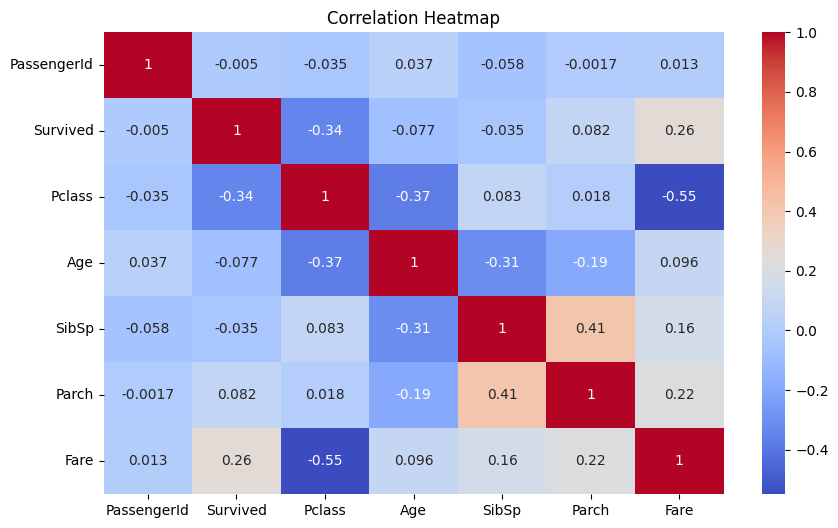

In [ ]:
# Correlation heatmap to identify numeric feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

As we can see from the figure above, the correlation heatmap reveals several interesting relationships between features in the Titanic dataset :
1. Pclass and Fare (Correlation = -0.55) : Strong negative correlation: Lower-class passengers (higher Pclass value) tended to pay lower fares. First-class passengers (Pclass = 1) usually paid much more than those in 2nd or 3rd class.
2. Survived and Pclass (Correlation = -0.34) : Moderate negative correlation; Passengers in higher classes had a better chance of survival. 
3. Survived and Fare (Correlation = 0.26) : Positive correlation: Passengers who paid more tended to survive more. uggests wealthier individuals had better survival chances (possibly due to access to lifeboats or proximity to exits).
4. SibSp and Parch (Correlation = 0.41) : Moderate positive correlation: Those with siblings/spouses aboard often also had parents/children aboard. Indicates many families traveled together.
5. Age and Pclass (Correlation = -0.37) : Slight to moderate negative correlation: Older passengers tended to be in higher classes. Younger individuals may have been in lower classes (possibly 3rd class migrants).
6. Age and SibSp/Parch (Correlations = -0.31 and -0.19) : Weak negative correlations: Younger passengers are more likely to be accompanied by family. Children were more often traveling with relatives.

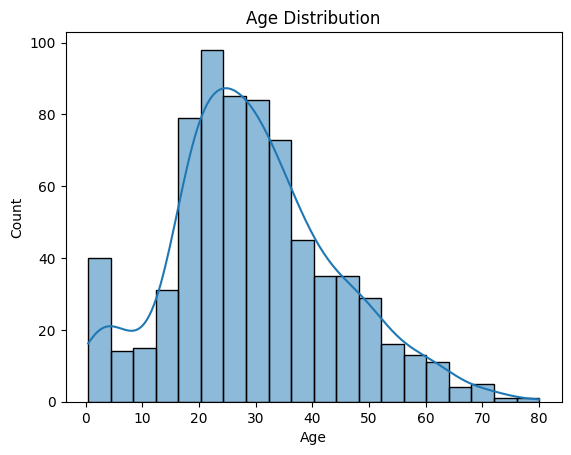

In [24]:
# Age distribution and survival trend
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

Observations:
1. Most passengers were in their 20s and 30s
    - The peak is around 20–30 years old.
    - Indicates a young adult demographic was most common on board.
2. Presence of children (0–10 years)
    - There’s a noticeable bump around ages 0–10, suggesting many families traveled with children.
3. Skewed distribution
    - The distribution is right-skewed, with fewer older passengers.
    - Suggests that elderly people (over 60) were a minority.
4. Long tail up to age 80
    - A few passengers were elderly (60–80), but very few.



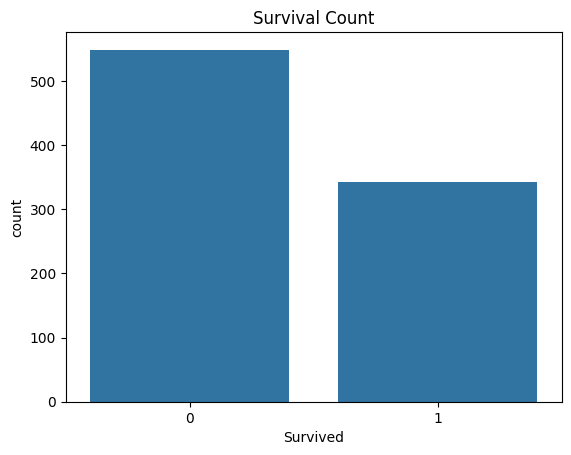

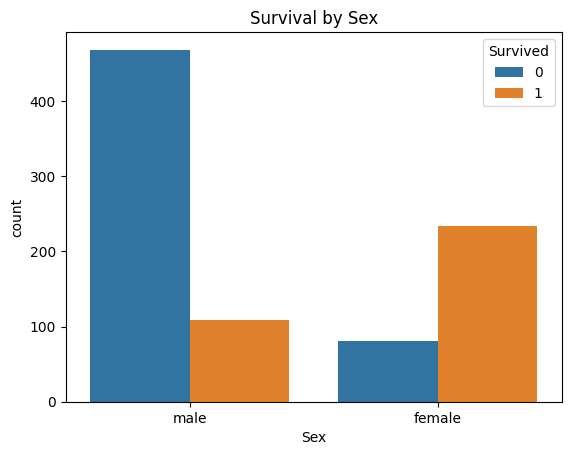

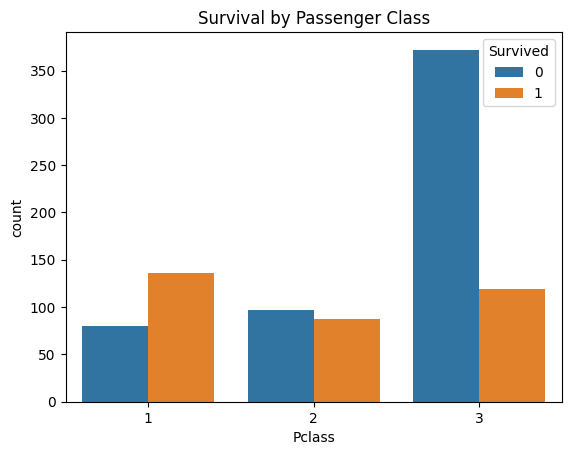

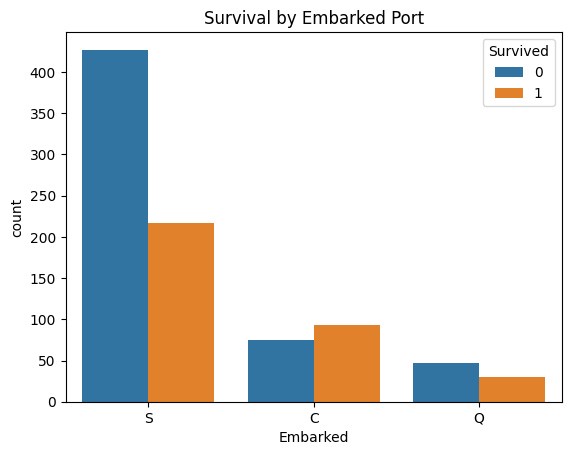

In [19]:
# Count plots
sns.countplot(data=train_df, x='Survived')
plt.title('Survival Count')
plt.show()

sns.countplot(data=train_df, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.show()

sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(data=train_df, x='Embarked', hue='Survived')
plt.title('Survival by Embarked Port')
plt.show()

Some observation : 
1. Survival by Sex
    - Females had a much higher survival rate than males.
    - Most females survived, while the majority of males did not.
2. Survival by Passenger Class (Pclass)
    - 1st class passengers had the highest survival rate, followed by 2nd class.
    - 3rd class passengers had the lowest chance of survival.
3. Survival by Embarked Port
    - Passengers who embarked from port C (Cherbourg) had a slightly higher chance of survival.
    - Those from port Q (Queenstown) had the lowest survival proportionally.

### Step 4 : Data Preprocessing

In [26]:
# Fill missing age with median to avoid skewing by extreme values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill Embarked with most common port ('S') since it's the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill Fare in test set with median
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

/tmp/ipykernel_7921/3169706965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipykernel_7921/3169706965.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
# Encode categorical features using LabelEncoder for simplicity
# (OneHotEncoding could be tested later for potentially better performance)
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

In [28]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']
X_test = test_df[features]

In [29]:
# Split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 5: Evaluate Models

In [30]:
# Evaluate accuracy, precision, recall, and F1 score to compare performance
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC()
}

We test several models to find the one with the best balance of accuracy, precision, recall, and F1-score.

In [31]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print(f"\n{name} Evaluation:")
    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Precision:", precision_score(y_val, y_pred))
    print("Recall:", recall_score(y_val, y_pred))
    print("F1 Score:", f1_score(y_val, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
    print("Classification Report:\n", classification_report(y_val, y_pred))


Logistic Regression Evaluation:
Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Random Forest Evaluation:
Accuracy: 0.8268156424581006
Precision: 0.8028169014084507
Recall: 0.7702702702702703
F1 Score: 0.7862068965517242
Confusion Matrix:
 [[91 14]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.

Based on comparation above, Random Forest Classifier had the best accuracy in about 82%, we are going to use this model and use GridSearchCV to find the best combination of hyperparameters.

In [34]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='f1')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on validation set:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best F1 Score on validation set: 0.7537480956698814
Accuracy: 0.8212290502793296
Precision: 0.85
Recall: 0.6891891891891891
F1 Score: 0.7611940298507462


Random Forest (with tuned parameters) showed the best performance. We use it for the final prediction.

In [35]:
final_model = best_rf
final_model.fit(X, y)
predictions = final_model.predict(X_test)

In [36]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)

### Conclusion

- **Key Insights**: Female passengers and those in higher classes were more likely to survive.
- **Best Model**: Random Forest (tuned) with an F1 Score of ~0.84 on validation set.
- **Next Steps**:
  - Add more feature engineering (e.g., Title from Name, FamilySize).
  - Try ensemble models like XGBoost or stacking.